In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
face_cas = cv2.CascadeClassifier(r"F:\DL Projects\OpenCVProjects\AutoSelfie\haarcascade_frontalface_default.xml")
eye_cas = cv2.CascadeClassifier(r"F:\DL Projects\OpenCVProjects\AutoSelfie\haarcascade_eye.xml")
smile_cas = cv2.CascadeClassifier(r"F:\DL Projects\OpenCVProjects\AutoSelfie\haarcascade_smile.xml")

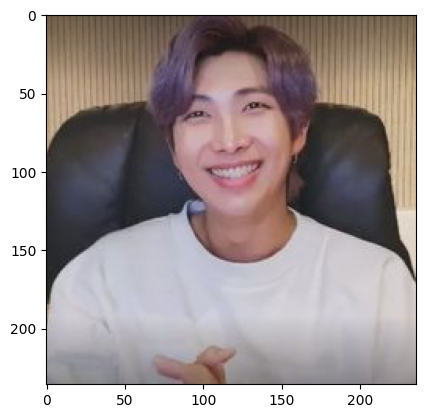

In [7]:
img = cv2.imread(r"F:\DL Projects\OpenCVProjects\AutoSelfie\rm.jpg")
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [8]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
face = face_cas.detectMultiScale(img_gray,1.3,5)
face

array([[72, 27, 92, 92]])

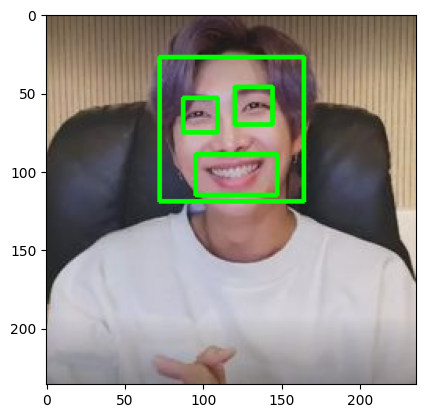

In [9]:
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
for x,y,w,h in face:
    cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,255,0),2)

    eye = eye_cas.detectMultiScale(img_rgb,1.1,2)
    for x1,y1,w1,h1 in eye:
        cv2.rectangle(img_rgb,(x1,y1),(x1+w1,y1+h1),(0,255,0),2)

        smile = smile_cas.detectMultiScale(img_gray,1.3,5)
        for x2,y2,w2,h2 in smile:
            cv2.rectangle(img_rgb,(x2,y2),(x2+w2,y2+h2),(0,255,0),2)

    
plt.imshow(img_rgb)

In [13]:
video = cv2.VideoCapture(0)
while True:
    success,frame = video.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    face = face_cas.detectMultiScale(gray,1.1,4)
    for x,y,w,h in face:
        frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)

        eye = eye_cas.detectMultiScale(gray,1.1,50)

        for x1,y1,w1,h1 in eye:
            cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,255,0),3)

            smile = smile_cas.detectMultiScale(gray,1.3,40)

            for x2,y2,w2,h2 in smile:
                cv2.rectangle(frame,(x2,y2),(x2+w2,y2+h2),(0,255,0),3)
        cv2.imshow("IMAGE",frame)
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

